# Data Analysis

In this notebook, we'll put together many of the skills we've learned so far to analyze a set of .csv files containing inflammation data.

![](https://swcarpentry.github.io/python-novice-inflammation/fig/lesson-overview.svg)

## About this notebook
This notebook is based on [this notebook](https://swcarpentry.github.io/python-novice-inflammation/02-numpy/index.html) from the Software Carpentries and is licensed under a CC-BY-40 license (2018-2021):

> Azalee Bostroem, Trevor Bekolay, and Valentina Staneva (eds):
"Software Carpentry: Programming with Python."  Version 2016.06, June
2016, https://github.com/swcarpentry/python-novice-inflammation,
10.5281/zenodo.57492.

<hr>

As a final piece to processing our inflammation data, we need a way to get a list of all the files in our data directory whose names start with inflammation- and end with .csv. The following library will help us to achieve this:

In [80]:
import glob

The `glob` library ([Documentation](https://docs.python.org/3/library/glob.html)) contains a function, also called `glob`, that finds files and directories whose names match a pattern. We provide those patterns as strings: the character `*` matches zero or more characters, while `?` matches any one character. We can use this to get the names of all the inflammation CSV files in our data directory:

In [81]:
filenames = glob.glob('Data/inflammation/inflammation*.csv')
print(filenames)

['Data/inflammation/inflammation-10.csv', 'Data/inflammation/inflammation-12.csv', 'Data/inflammation/inflammation-08.csv', 'Data/inflammation/inflammation-02.csv', 'Data/inflammation/inflammation-06.csv', 'Data/inflammation/inflammation-04.csv', 'Data/inflammation/inflammation-07.csv', 'Data/inflammation/inflammation-03.csv', 'Data/inflammation/inflammation-05.csv', 'Data/inflammation/inflammation-09.csv', 'Data/inflammation/inflammation-01.csv', 'Data/inflammation/inflammation-11.csv']


As these examples show, `glob.glob`’s result is a list of file and directory paths in arbitrary order. This means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our inflammation dataset.

If we want to start by analyzing just the first three files in alphabetical order, we can use the `sort` method to sort the `glob.glob` output:

In [82]:
filenames = glob.glob('Data/inflammation/inflammation*.csv')
filenames.sort()
filenames

['Data/inflammation/inflammation-01.csv',
 'Data/inflammation/inflammation-02.csv',
 'Data/inflammation/inflammation-03.csv',
 'Data/inflammation/inflammation-04.csv',
 'Data/inflammation/inflammation-05.csv',
 'Data/inflammation/inflammation-06.csv',
 'Data/inflammation/inflammation-07.csv',
 'Data/inflammation/inflammation-08.csv',
 'Data/inflammation/inflammation-09.csv',
 'Data/inflammation/inflammation-10.csv',
 'Data/inflammation/inflammation-11.csv',
 'Data/inflammation/inflammation-12.csv']

Now, we'll loop through those first three files and plot the mean.

Data/inflammation/inflammation-01.csv


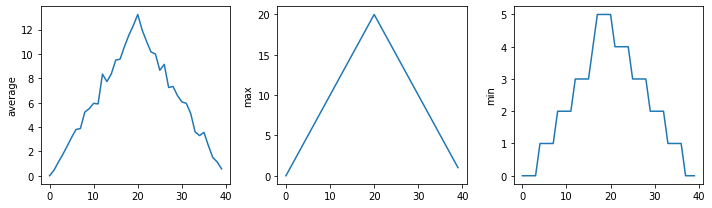

Data/inflammation/inflammation-02.csv


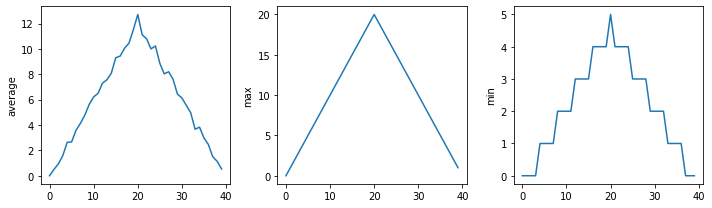

Data/inflammation/inflammation-03.csv


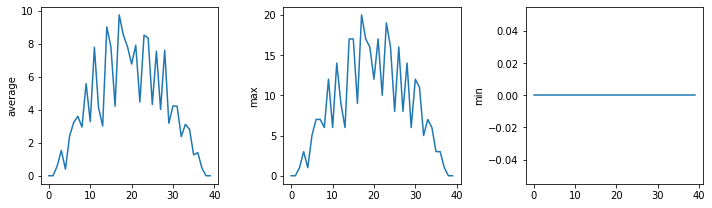

In [83]:
import numpy as np
import matplotlib.pyplot as plt

first_three_files = filenames[0:3]       # Step 1

for filename in first_three_files:       # Step 2
    
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',')    # Step 3

    fig,ax = plt.subplots(1,3,figsize=(10.0, 3.0))      # Step 4

    ax[0].set_ylabel('average')          # Step 5
    ax[0].plot(np.mean(data, axis=0))

    ax[1].set_ylabel('max')
    ax[1].plot(np.max(data, axis=0))

    ax[2].set_ylabel('min')
    ax[2].plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()

The plots generated for the second clinical trial file look very similar to the plots for the first file: their average plots show similar “noisy” rises and falls; their maxima plots show exactly the same linear rise and fall; and their minima plots show similar staircase structures.

The third dataset shows much noisier average and maxima plots that are far less suspicious than the first two datasets, however the minima plot shows that the third dataset minima is consistently zero across every day of the trial. If we produce a heat map for the third data file we see the following:

In [84]:
print(filenames)

['Data/inflammation/inflammation-01.csv', 'Data/inflammation/inflammation-02.csv', 'Data/inflammation/inflammation-03.csv', 'Data/inflammation/inflammation-04.csv', 'Data/inflammation/inflammation-05.csv', 'Data/inflammation/inflammation-06.csv', 'Data/inflammation/inflammation-07.csv', 'Data/inflammation/inflammation-08.csv', 'Data/inflammation/inflammation-09.csv', 'Data/inflammation/inflammation-10.csv', 'Data/inflammation/inflammation-11.csv', 'Data/inflammation/inflammation-12.csv']


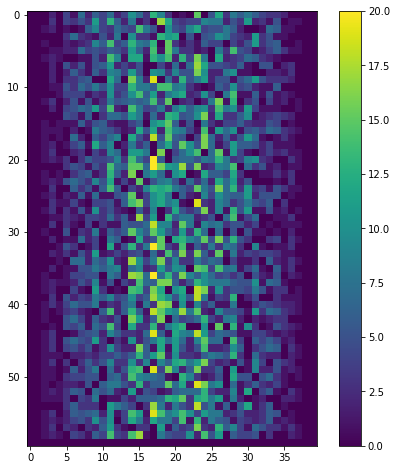

In [85]:
# Load data for third data file
data = np.loadtxt(fname=filenames[2], delimiter=',')

# Plot heatmap
plt.figure(figsize=(8,8))
plt.imshow(data)

plt.colorbar()
plt.show()

Looking closely, we can see that there are zero values sporadically distributed across all patients and days of the clinical trial, suggesting that there were potential issues with data collection throughout the trial. In addition, we can see that the last patient in the study didn’t have any inflammation flare-ups at all throughout the trial, suggesting that they may not even suffer from arthritis!

### Task 1: Plotting differences
> Plot the difference between the average inflammations (in other words, one mean minus another mean) reported in the first and second datasets (stored in inflammation-01.csv and inflammation-02.csv, correspondingly). In other words, plot the difference between the leftmost plots of the first two figures above.

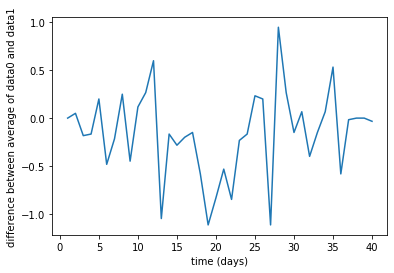

In [47]:
# Plot the data here
data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')

data0_ave0 = np.mean(data0,axis=0)
data1_ave0 = np.mean(data1,axis=0)

plt.plot(np.linspace(1,40,40),data1_ave0-data0_ave0)
plt.xlabel('time (days)')
plt.ylabel('difference between average of data0 and data1')
plt.show()

### Task 2: Generate composite statistics

> 1. Use each of the files once to generate a dataset containing values averaged over all patients. There is a skeleton for this below.
> 2. Use `plt.plot()` to generate plots of average, max, and min for *all* patients.

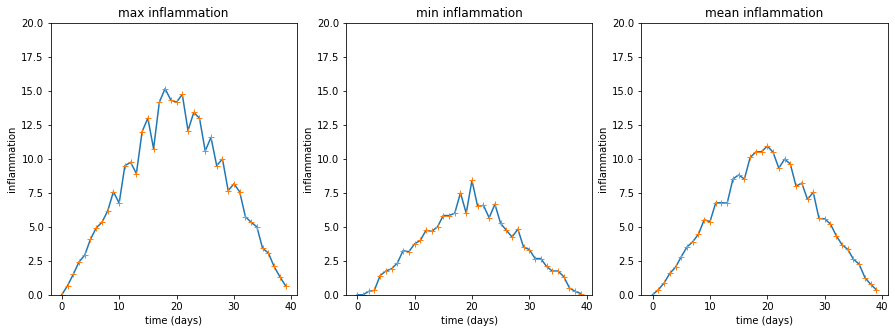

In [94]:
filenames = glob.glob('Data/inflammation/inflammation*.csv')
composite_data = np.zeros((60,40))
composite_data_3D = np.zeros((60,40,12))
for filename in filenames:
    # sum each new file's data into composite_data as it's read
    composite_data += np.loadtxt(fname=filename, delimiter=',')

for i in range(len(filenames)):
    # sum each new file's data into composite_data as it's read
    composite_data_3D[:,:,i] = np.loadtxt(fname=filenames[i], delimiter=',')
# and then divide the composite_data by number of samples
composite_data = composite_data / len(filenames)
composite_data_3D_average = np.mean(composite_data_3D,axis = 2)

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(np.max(composite_data,axis=0))
ax[0].plot(np.max(composite_data_3D_average,axis=0),'+')
plt.plot?
ax[1].plot(np.min(composite_data,axis=0))
ax[1].plot(np.min(composite_data_3D_average,axis=0),'+')

ax[2].plot(np.mean(composite_data,axis=0))
ax[2].plot(np.mean(composite_data_3D_average,axis=0),'+')

ax[0].set_title('max inflammation')
ax[1].set_title('min inflammation')
ax[2].set_title('mean inflammation')

ax[0].set_xlabel('time (days)')
ax[1].set_xlabel('time (days)')
ax[2].set_xlabel('time (days)')

ax[0].set_ylabel('inflammation')
ax[1].set_ylabel('inflammation')
ax[2].set_ylabel('inflammation')

ax[0].set_ylim((0,20))
ax[1].set_ylim((0,20))
ax[2].set_ylim((0,20))
plt.show()

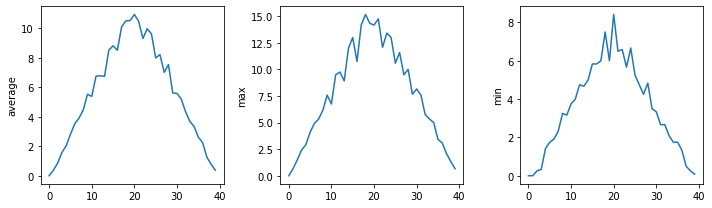

In [58]:
import glob
import numpy
import matplotlib.pyplot

composite_data = numpy.zeros((60,40))

for filename in filenames:
    data = numpy.loadtxt(fname = filename, delimiter=',')
    composite_data = composite_data + data

composite_data = composite_data / len(filenames)

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(composite_data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

After spending some time investigating the heat map and statistical plots, as well as doing the above exercises to plot differences between datasets and to generate composite patient statistics, we gain some insight into the twelve clinical trial datasets.

The datasets appear to fall into two categories:

1. seemingly “ideal” datasets that agree excellently with Dr. Maverick’s claims, but display suspicious maxima and minima (such as inflammation-01.csv and inflammation-02.csv)
2. “noisy” datasets that somewhat agree with Dr. Maverick’s claims, but show concerning data collection issues such as sporadic missing values and even an unsuitable candidate making it into the clinical trial.

In fact, it appears that all three of the “noisy” datasets (inflammation-03.csv, inflammation-08.csv, and inflammation-11.csv) are identical down to the last value. Armed with this information, we confront Dr. Maverick about the suspicious data and duplicated files.

<img src="https://c.tenor.com/Pkj5t7gMBoIAAAAC/scrunch-suspicious.gif" alt="gif" width="400" height="400">

Dr. Maverick confesses that they fabricated the clinical data after they found out that the initial trial suffered from a number of issues, including unreliable data-recording and poor participant selection. They created fake data to prove their drug worked, and when we asked for more data they tried to generate more fake datasets, as well as throwing in the original poor-quality dataset a few times to try and make all the trials seem a bit more “realistic”.

Congratulations! We’ve investigated the inflammation data and proven that the datasets have been synthetically generated. Let's dig in a little further though.

## What's up with our data?
Below, we'll use conditionals to inspect the suspicious features we saw in our inflammation data.

From the first couple of plots we generated above, we saw that maximum daily inflammation exhibits a strange behavior and raises one unit a day. Wouldn’t it be a good idea to detect such behavior and report it as suspicious? Let’s do that! However, instead of checking every single day of the study, let’s merely check if maximum inflammation in the beginning (day 0) and in the middle (day 20) of the study are equal to the corresponding day numbers. The code to do so would look like this:

```
max_inflammation_0 = np.max(data, axis=0)[0]
max_inflammation_20 = np.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
```

We also saw a different problem in the third dataset; the minima per day were all zero (looks like a healthy person snuck into our study). We can also check for this with an elif condition:

```
elif np.sum(np.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
```

And if neither of these conditions are true, we can use else to give the all-clear:

```
else:
    print('Seems OK!')
```

### Task 3: Wrap your data cleaning into a function
> Using the provided code above, write a function called `clean_data` which takes in a filename and performs the checks above.

In [69]:
# Write your function here
# print(filenames)
def clean_data(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    max_inflammation_0 = np.max(data, axis=0)[0]
    max_inflammation_20 = np.max(data, axis=0)[20]

    if max_inflammation_0 == 0 and max_inflammation_20 == 20:
        print('Suspicious looking maxima!')
    elif np.sum(np.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')
filenames.sort()
for filename in filenames:
    print(filename ,':' )
    clean_data(filename)
    print('\n')

Data/inflammation/inflammation-01.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-02.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-03.csv :
Minima add up to zero!


Data/inflammation/inflammation-04.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-05.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-06.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-07.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-08.csv :
Minima add up to zero!


Data/inflammation/inflammation-09.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-10.csv :
Suspicious looking maxima!


Data/inflammation/inflammation-11.csv :
Minima add up to zero!


Data/inflammation/inflammation-12.csv :
Suspicious looking maxima!




### Other data analysis functions
Below, we write a function to offset a dataset so that it’s mean value shifts to a user-defined value:

In [70]:
def offset_mean(data, target_mean_value):
    '''Return a new array containing the original data
       with its mean offset to match the desired value.'''
    return (data - np.mean(data)) + target_mean_value

Let’s try `offset_mean` on our real inflammation data:

In [71]:
# Check that our function works
data = np.loadtxt(fname='Data/inflammation/inflammation-01.csv', delimiter=',')

offset_mean(data, 0)

array([[-6.14875, -6.14875, -5.14875, ..., -3.14875, -6.14875, -6.14875],
       [-6.14875, -5.14875, -4.14875, ..., -5.14875, -6.14875, -5.14875],
       [-6.14875, -5.14875, -5.14875, ..., -4.14875, -5.14875, -5.14875],
       ...,
       [-6.14875, -5.14875, -5.14875, ..., -5.14875, -5.14875, -5.14875],
       [-6.14875, -6.14875, -6.14875, ..., -6.14875, -4.14875, -6.14875],
       [-6.14875, -6.14875, -5.14875, ..., -5.14875, -5.14875, -6.14875]])

It’s hard to tell from the default output whether the result is correct, but there are a few tests that we can run to reassure us:

In [72]:
print('original min, mean, and max are:', np.min(data), np.mean(data), np.max(data))
offset_data = offset_mean(data, 0)

print('min, mean, and max of offset data are:',
      np.min(offset_data),
      np.mean(offset_data),
      np.max(offset_data))

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of offset data are: -6.14875 2.842170943040401e-16 13.85125


That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the offset data isn’t quite zero, but it’s pretty close.

### Side note: setting default values in our function
Finally, if we wanted to write this function so that we don't *need* to give it a `target_mean_value`, we can set a default value:

In [73]:
def offset_mean(data, target_mean_value=0.0):
    """Return a new array containing the original data
       with its mean offset to match the desired value, (0 by default).

    Examples
    --------
    >>> offset_mean([1, 2, 3])
    array([-1.,  0.,  1.])
    """
    return (data - np.mean(data)) + target_mean_value

The key change is that the second parameter is now written `target_mean_value=0.0` instead of just `target_mean_value`. If we call the function with two arguments, it works as it did before:

In [77]:
# Test our function
print(offset_mean(data))

[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [78]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [79]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


Nicely done, now you're ready to analyze lots of data!